https://www.kaggle.com/datasets/mirichoi0218/insurance

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


In [102]:
ad = pd.read_csv("insurance.csv",)
df = ad.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
df.shape

(1338, 7)

# Simple Linear Regression:

In [104]:
from sklearn.linear_model import LinearRegression


In [105]:
X = df[["bmi"]]
y = df["charges"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_


1192.937208961137

In [106]:
model.coef_

array([393.8730308])

In [107]:
model.score(X,y)


0.03933913991786264

In [108]:
model.predict(X)[0:10]

array([12181.99476821, 14494.02945899, 14190.74722528, 10135.82437322,
       12567.99033839, 11331.22902169, 14364.05135883, 12118.97508328,
       12942.16971765, 11370.61632477])

In [109]:
y[0:10]


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
6     8240.58960
7     7281.50560
8     6406.41070
9    28923.13692
Name: charges, dtype: float64

In [110]:
model = reg.fit(X, y)

In [111]:
model.predict([[30]])


/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13009.12813288])

In [112]:
new_data = [[28],[30],[32]]

In [113]:
model.predict(new_data)

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12221.38207129, 13009.12813288, 13796.87419448])

In [114]:
y_true = y[0:10]
y_pred = reg.predict(X)[0:10]

In [115]:
linear_r2 = r2_score(y_true, y_pred)
linear_r2

-0.29188156510030816

In [116]:
linear_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
linear_rmse

9824.581712159721

# Multiple Linear Regression

In [117]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [118]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [119]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_encoded = df_encoded.astype(int)

# Create new columns is_north and is_west
df_encoded['is_north'] = df['region'].isin(['northeast', 'northwest']).astype(int)
df_encoded['is_west'] = df['region'].isin(['northwest', 'southwest']).astype(int)

# Drop unnecessary columns
df_encoded.drop(['sex_male', 'smoker_no', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1, inplace=True)

df_encoded

,age,bmi,children,charges,sex_female,smoker_yes,is_north,is_west
0,19,27,0,16884,1,1,0,1
1,18,33,1,1725,0,0,0,0
2,28,33,3,4449,0,0,0,0
3,33,22,0,21984,0,0,1,1
4,32,28,0,3866,0,0,1,1
...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,0,1,1
1334,18,31,0,2205,1,0,1,0
1335,18,36,0,1629,1,0,0,0
1336,21,25,0,2007,1,0,0,1


In [120]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [121]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [122]:
model.intercept_


-12329.877728857562

In [123]:
model.coef_


array([ 2.57155737e+02,  3.34560942e+02,  4.27241945e+02,  1.76810564e+01,
        2.36533007e+04,  5.61490076e+02, -2.57010926e+02])

In [124]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [125]:
multi_r2 = r2_score(y_test, y_pred)
multi_r2

0.7835973017419025

In [126]:
multi_rmse = mean_squared_error(y_test, y_pred, squared=False)
multi_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5796.220881266894

## Tuning

In [127]:
X = df.drop('charges', axis=1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [128]:
model.score(X_train, y_train)


0.7520758814575997

In [129]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

6099.974228867222

In [130]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

5576.4036556004285

# Principal Component Regression (PCR)

In [131]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [133]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

In [134]:
X_reduced_train.shape


(1070, 7)

In [135]:
X_reduced_train[:,0]


array([-2.01245162, -0.92962228,  0.39280656, ..., -0.62016639,
        2.311582  ,  0.5737351 ])

In [136]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:7] 


array([ 22.49,  39.25,  53.77,  67.78,  79.71,  90.87, 100.  ])

It is decided to use all the columns to represent the whole data.

In [137]:
lm = LinearRegression()

In [138]:
pcr_model = lm.fit(X_reduced_train, y_train)


In [139]:
pcr_model.intercept_


13345.596261682243

In [140]:
pcr_model.coef_


array([2393.94414097, 3705.02677994, 5100.52001553, 1105.25848564,
       1868.07760524, 7590.52184779, 1069.44808842])

In [141]:
y_pred = pcr_model.predict(X_reduced_test)

In [142]:
pcr_r2 = r2_score(y_test, y_pred)
pcr_r2

-0.44673082500106376

In [143]:
pcr_rmse = mean_squared_error(y_test, y_pred, squared=False)
pcr_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


14986.749864858992

## Model Tuning

In [144]:
from sklearn import model_selection


In [145]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [146]:
RMSE = []
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_32909/1891518475.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_32909/1891518475.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_32909/1891518475.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel(),
/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_32909/1891518475.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy

In [147]:
import matplotlib.pyplot as plt


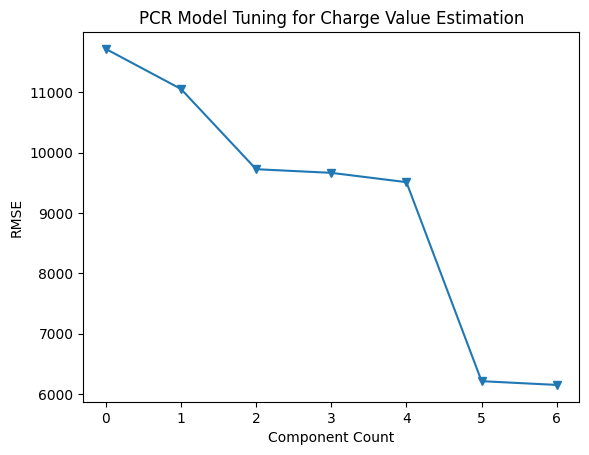

In [148]:
plt.plot(RMSE, '-v')
plt.xlabel('Component Count')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning for Charge Value Estimation');


We understand that using all principal components result much lower RMSE so we do not change our model.

# Partial Least Squares (PLS)

In [149]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [150]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD


In [151]:
pls_model = PLSRegression().fit(X_train, y_train)


In [152]:
pls_model.coef_


array([[3604.98081455, 1914.77315322,  588.82905424,  -57.87070418,
        9581.81522751,  285.65429806, -157.28673412]])

In [153]:
y_pred = pls_model.predict(X_test)

In [154]:
pls_r2 = r2_score(y_test, y_pred)
pls_r2

0.7837916474044213

In [155]:
pls_rmse = mean_squared_error(y_test, y_pred, squared=False)
pls_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5793.617578666115

## Model Tuning

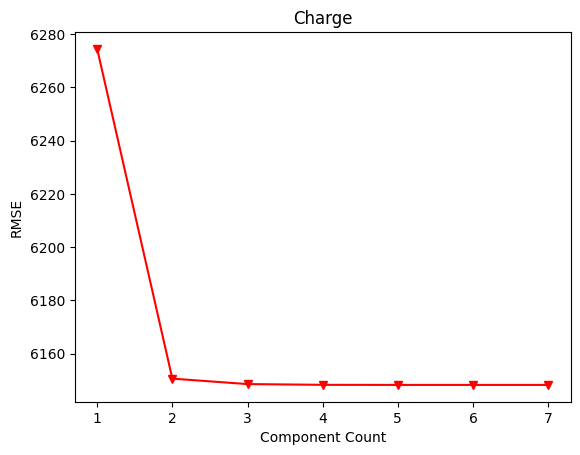

In [156]:
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)


plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Component Count')
plt.ylabel('RMSE')
plt.title('Charge');

# Ridge Regression

In [168]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [169]:
from sklearn.linear_model import Ridge


In [170]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)


In [171]:
ridge_model.coef_


array([ 2.57136212e+02,  3.34548448e+02,  4.27296330e+02,  1.68853368e+01,
        2.36396222e+04,  5.61046301e+02, -2.57523534e+02])

In [172]:
y_pred = ridge_model.predict(X_test)

In [173]:
ridge_r2 = r2_score(y_test, y_pred)
ridge_r2

0.7835688198444615

In [174]:
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
ridge_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5796.602304276791

## Tuning

In [175]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 


In [177]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error")

In [178]:
ridge_cv.fit(X_train, y_train)


RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [179]:
ridge_cv.alpha_


0.24885117821660568

In [182]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train,y_train)

In [183]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))


5797.1786626791045

# Lasso Regression

In [191]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [192]:
from sklearn.linear_model import Lasso


In [193]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)


In [194]:
lasso_model.coef_


array([ 2.57154739e+02,  3.34551971e+02,  4.27174875e+02,  1.72327002e+01,
        2.36526659e+04,  5.61049051e+02, -2.56641487e+02])

In [195]:
y_pred = model.predict(X_test)

In [196]:
lasso_r2 = r2_score(y_test, y_pred)
lasso_r2

0.784898667713801

In [197]:
lasso_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasso_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5778.766433795813

## Tuning

In [198]:
from sklearn.linear_model import LassoCV


In [199]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000
                         )


In [200]:
lasso_cv_model.fit(X_train,y_train)


LassoCV(cv=10, max_iter=10000)

In [201]:
lasso_cv_model.alpha_


54.74234958376863

In [202]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)


In [203]:
lasso_tuned.fit(X_train, y_train)


Lasso(alpha=54.74234958376863)

In [204]:
y_pred = lasso_tuned.predict(X_test)


In [205]:
np.sqrt(mean_squared_error(y_test, y_pred))


5817.49658034954

# Elasticnet Regression

In [206]:
df = df_encoded
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)
training (1338, 8)


In [207]:
from sklearn.linear_model import ElasticNet


In [208]:
enet_model = ElasticNet().fit(X_train, y_train)


In [209]:
enet_model.coef_


array([ 230.76770394,  322.24968469,  396.98280203, -336.62782952,
       5800.30045445,   93.41980947, -345.58210462])

In [210]:
enet_model.intercept_


-6772.233423238806

In [211]:
y_pred = enet_model.predict(X_test)


In [212]:
enet_r2 = r2_score(y_test, y_pred)
enet_r2

0.41771256716470506

In [213]:
enet_rmse = mean_squared_error(y_test, y_pred, squared=False)
enet_rmse

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9507.849527182938

## Tuning

In [215]:
from sklearn.linear_model import ElasticNetCV


In [216]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)


In [217]:
enet_cv_model.alpha_


95.2242079028736

In [218]:
enet_cv_model


ElasticNetCV(cv=10, random_state=0)

In [219]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)


In [220]:
y_pred = enet_tuned.predict(X_test)


In [221]:
np.sqrt(mean_squared_error(y_test, y_pred))


11589.557359221431

# Result

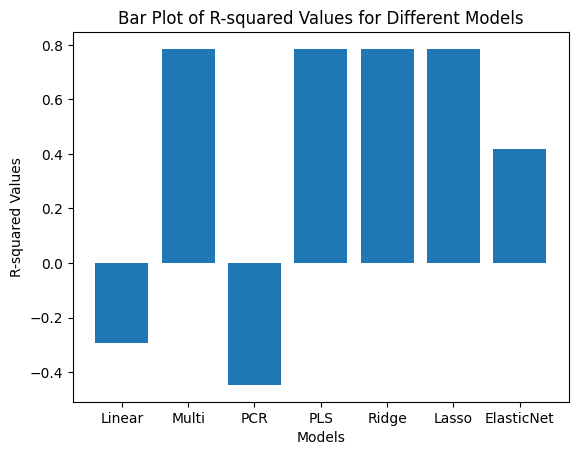

In [222]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PCR', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [linear_r2, multi_r2, pcr_r2, pls_r2, ridge_r2, lasso_r2, enet_r2]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('R-squared Values')
plt.title('Bar Plot of R-squared Values for Different Models')

plt.show()


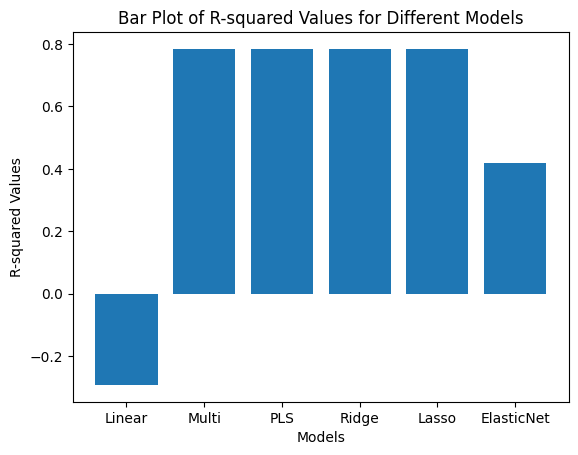

In [118]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [linear_r2, multi_r2, pls_r2, ridge_r2, lasso_r2, enet_r2]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('R-squared Values')
plt.title('Bar Plot of R-squared Values for Different Models')

plt.show()

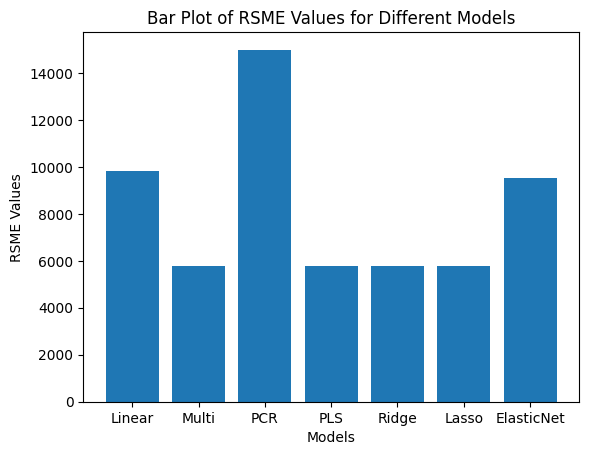

In [223]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PCR', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [linear_rmse, multi_rmse, pcr_rmse, pls_rmse, ridge_rmse, lasso_rmse, enet_rmse]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('RSME Values')
plt.title('Bar Plot of RSME Values for Different Models')

plt.show()

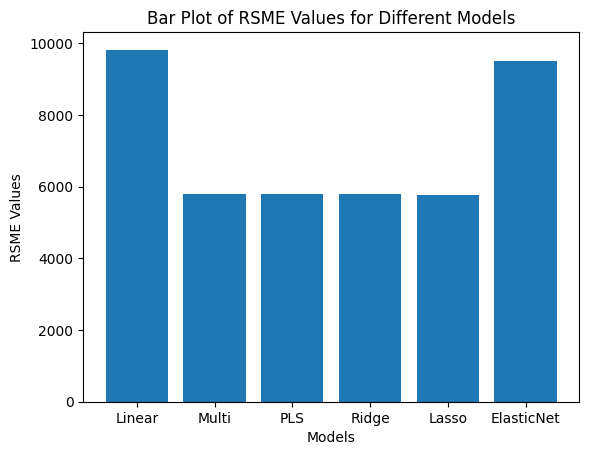

In [224]:
# Define the variables and their values
variables = ['Linear', 'Multi', 'PLS', 'Ridge', 'Lasso', 'ElasticNet']
values = [linear_rmse, multi_rmse, pls_rmse, ridge_rmse, lasso_rmse, enet_rmse]  # Example values for each variable

plt.bar(variables, values)

plt.xlabel('Models')
plt.ylabel('RSME Values')
plt.title('Bar Plot of RSME Values for Different Models')

plt.show()

In [225]:
print(linear_r2, multi_r2, pls_r2, ridge_r2, lasso_r2, enet_r2)

-0.29188156510030816 0.7835973017419025 0.7837916474044213 0.7835688198444615 0.784898667713801 0.41771256716470506
